In [1]:
import os
import pandas as pd
import PIL
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

# Load test cases
test_cases_df = pd.read_csv("testcases.csv")


In [2]:
# Define image processing function
def image_processing(image):
    model_url = 'https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_asia_V1/1'
    labels_path = 'landmarks_classifier_asia_V1_label_map.csv'

    # Load labels
    df = pd.read_csv(labels_path)
    labels = dict(zip(df.id, df.name))

    img_shape = (321, 321)
    classifier = hub.load(model_url)

    # Extract the specific signature we need
    signature = classifier.signatures['default']

    # Resize and normalize image
    img = tf.image.resize(image, img_shape) / 255.0

    # Predict
    result = signature(tf.expand_dims(img, axis=0))
    prediction = labels[np.argmax(result['predictions:logits'][0])]

    # Convert the image to PIL format for display
    img_pil = PIL.Image.fromarray((image * 255).astype(np.uint8))

    return prediction, img_pil


In [3]:
# Define a function to predict landmark
def predict_landmark(image_path):
    img = PIL.Image.open(image_path)
    img_array = np.array(img)
    prediction, _ = image_processing(img_array)
    return prediction


In [4]:
# Define a function to generate image paths based on image names
def generate_image_path(image_name):
    return os.path.join("Images", f"{image_name}.jpg")


In [5]:
# Initialize variables for TP, TN, FP, FN
TP = TN = FP = FN = 0

# Perform test cases
for index, row in test_cases_df.iterrows():
    image_name = f"image{row['id']}"
    expected_landmark = row['output']
    image_path = generate_image_path(image_name)
    predicted_landmark = predict_landmark(image_path)
    
    # Update TP, TN, FP, FN based on prediction
    if predicted_landmark == expected_landmark:
        if predicted_landmark == "Unknown":
            TN += 1  # True Negative
        else:
            TP += 1  # True Positive
    else:
        if predicted_landmark == "Unknown":
            FN += 1  # False Negative
        else:
            FP += 1  # False Positive

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Display TP, TN, FP, FN and accuracy
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


True Positive (TP): 19
True Negative (TN): 0
False Positive (FP): 1
False Negative (FN): 0


In [6]:
def calculate_metrics(TP, TN, FP, FN):
    # Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    # Precision
    precision = TP / (TP + FP) if TP + FP != 0 else 0

    # Recall
    recall = TP / (TP + FN) if TP + FN != 0 else 0

    # F1 Score
    f1_score = 2 * precision * recall / (precision + recall) if precision + recall != 0 else 0

    return accuracy, precision, recall, f1_score


accuracy, precision, recall, f1_score = calculate_metrics(TP, TN, FP, FN)

print("Accuracy:", accuracy*100,"%")
print("Precision:", precision*100,"%")
print("Recall:", recall*100,"%")
print("F1 Score:", f1_score*100,"%")


Accuracy: 95.0 %
Precision: 95.0 %
Recall: 100.0 %
F1 Score: 97.43589743589743 %


In [7]:
# Create confusion matrix
conf_matrix = np.array([[TP, FP],
                        [FN, TN]])


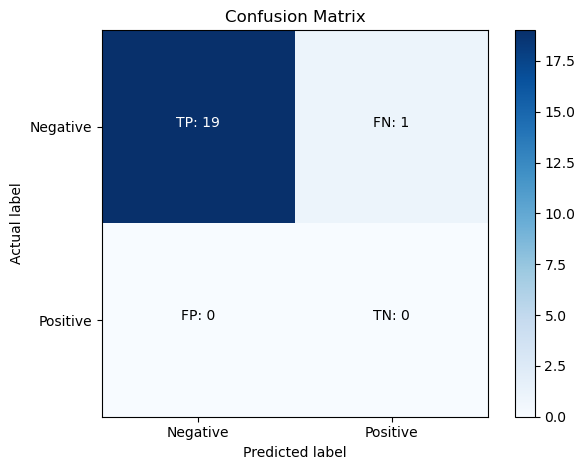

In [8]:
# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        # Add TP, TN, FP, FN values in appropriate boxes
        if i == 0 and j == 0:
            plt.text(j, i, f'TP: {conf_matrix[i, j]}',
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")
        elif i == 0 and j == 1:
            plt.text(j, i, f'FN: {conf_matrix[i, j]}',
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")
        elif i == 1 and j == 0:
            plt.text(j, i, f'FP: {conf_matrix[i, j]}',
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")
        elif i == 1 and j == 1:
            plt.text(j, i, f'TN: {conf_matrix[i, j]}',
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()